# Simulation 2.3- Analysing


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut


import gym
import ctfsql
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate as ev

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2
#Not good practice, but allows for plots.
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
env = gym.make('ctfsql-v0')
folder = ""
#folder = "D:/Dropbox2/Dropbox/PhDSource/data/sql/"

## Reading the models

In [4]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(str(i) + "ignore_simul6*.zip"):
        print(folder + file[:-4])
        model = DQN.load(folder + file[:-4])
        dqn_models.append(model)
        print(model)
#dqn_models[i].save(str(i) + 'ignore_simul2_'+timestamp)


0ignore_simul6_20210225160300517748
1ignore_simul6_20210225164336887478
2ignore_simul6_20210225172319396466
3ignore_simul6_20210225212015284047
4ignore_simul6_20210225215922393762
5ignore_simul6_20210225223828728530
6ignore_simul6_20210225231656072778
7ignore_simul6_20210226095014203105
8ignore_simul6_20210226102800896293
9ignore_simul6_20210226110625059149


In [5]:
#import evaluate15 as ev2
#for i in range(n_simulations):
#    mean_reward, _, median_reward = ev2.evaluate_model_deterministic(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [6]:
#import evaluate15 as ev2
#for i in tqdm(range(n_simulations)):
#    mean_reward, _, median_reward = ev2.evaluate_model_nondeter(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [7]:
import evaluate17 as ev2
#for i in tqdm(range(n_simulations)):
reward = ev2.test_episodes(dqn_models[i], env, num_episodes=100)
num_steps = 10-np.array(reward)

j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 

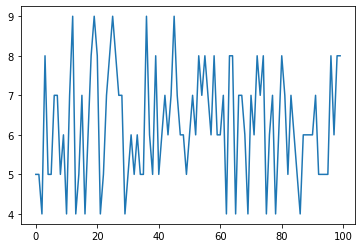

In [8]:
plt.plot(reward)

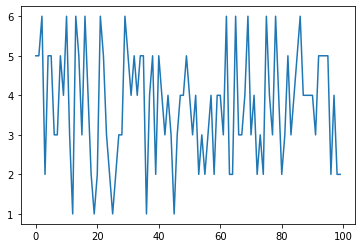

In [9]:
plt.plot(num_steps)

In [10]:
rewards = []
num_steps = []
for i in tqdm(range(n_simulations)):
    rewards.append(ev2.test_episodes(dqn_models[i], env, num_episodes=1000))
    reward = rewards[-1]
    #We have to add one because the finding flag action is free.
    num_steps.append(10-np.array(reward) + 1)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 j 173 j 174 j 175 j 176 j 177 j 178 j 179 j 180 j 181 j 182 j 183 j 184 

 10%|████████▎                                                                          | 1/10 [00:05<00:50,  5.58s/it]

j 977 j 978 j 979 j 980 j 981 j 982 j 983 j 984 j 985 j 986 j 987 j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 

 20%|████████████████▌                                                                  | 2/10 [00:11<00:45,  5.68s/it]

990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 j 173 j 174 j 

 30%|████████████████████████▉                                                          | 3/10 [00:16<00:39,  5.64s/it]

j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 j 173 j 174 j 175 j 176 j 177 j 178 j 179 j 180 

 40%|█████████████████████████████████▏                                                 | 4/10 [00:22<00:33,  5.63s/it]

j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 j 173 j 174 j 175 j 176 j 177 j 178 j 179 j 180 j 181 j 182 j 183 

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:28<00:28,  5.60s/it]

j 977 j 978 j 979 j 980 j 981 j 982 j 983 j 984 j 985 j 986 j 987 j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:33<00:22,  5.62s/it]

j 974 j 975 j 976 j 977 j 978 j 979 j 980 j 981 j 982 j 983 j 984 j 985 j 986 j 987 j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:39<00:17,  5.78s/it]

j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 j 173 j 174 j 175 j 176 

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:45<00:11,  5.75s/it]

j 979 j 980 j 981 j 982 j 983 j 984 j 985 j 986 j 987 j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:51<00:05,  5.70s/it]

j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 j 100 j 101 j 102 j 103 j 104 j 105 j 106 j 107 j 108 j 109 j 110 j 111 j 112 j 113 j 114 j 115 j 116 j 117 j 118 j 119 j 120 j 121 j 122 j 123 j 124 j 125 j 126 j 127 j 128 j 129 j 130 j 131 j 132 j 133 j 134 j 135 j 136 j 137 j 138 j 139 j 140 j 141 j 142 j 143 j 144 j 145 j 146 j 147 j 148 j 149 j 150 j 151 j 152 j 153 j 154 j 155 j 156 j 157 j 158 j 159 j 160 j 161 j 162 j 163 j 164 j 165 j 166 j 167 j 168 j 169 j 170 j 171 j 172 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.68s/it]

j 986 j 987 j 988 j 989 j 990 j 991 j 992 j 993 j 994 j 995 j 996 j 997 j 998 j 999 

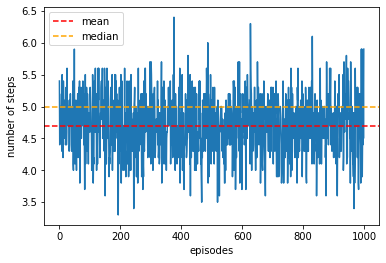

In [33]:
#plt.errorbar(range(n_episodes_test*10),np.mean(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
plt.plot(range(n_episodes_test*10),np.mean(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
plt.legend()
plt.savefig("figures/sim2_3_test1.png")

In [23]:
num_steps = 10 - np.array(rewards) + 1

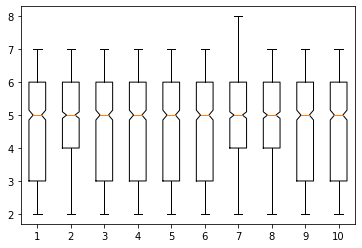

In [31]:
plt.boxplot(num_steps.T, notch = True)
plt.savefig("figures/sim2_3_test2.png")

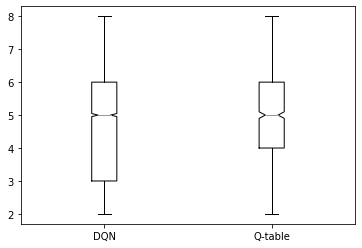

In [32]:
test_data = joblib.load('ignore_simul1_testdata_20210225215819702347.pkl')
plt.boxplot([num_steps.flatten(),test_data[:,0,:].flatten()], notch = True, labels = ["DQN", "Q-table"])
plt.savefig("figures/sim2_3_test3.png")